# Contents:

I. [Outlier Treatment:](#Outlier-Treatment:)

II. [Feature Engineering:](#Feature-Engineering:)

* [Average price by sub-area:](#Average-price-by-sub-area:)

* [Amenities score:](#Amenities-score:)

* [Average price by Amenities score:](#Average-price-by-Amenities-score:)

III. [Feature Extraction:](#Feature-Extraction:)

* [Wordcloud of the Description:](#Wordcloud-of-the-Description:)

* [POS features:](#POS-features:)

* [Ngram features:](#Ngram-features:)

IV. [Saving the final model ready data:](#Saving-the-final-model-ready-data:)

## Outlier Treatment:

([Contents:](#Contents:))

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time 
import re

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/real_estate_selected.csv')
print(df.shape)
df.head()

(199, 17)


,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0
3,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha township are offering 3bhk grand prpoer...,1,1,1,1,1,1,1,1018.0,89.0
4,pune,maharashtra,india,2.0,mahalunge,godrej properties,godrej hills retreat,the area is a hub of prestigious schools like ...,1,1,1,1,1,1,1,743.0,74.0


In [4]:
# Treating outliers in the numeric columns
cols_to_treat = ['Property Area in Sq. Ft. Cleaned','Price in lakhs Cleaned']

print("\nDistribution (raw):")
display(df[cols_to_treat].describe())        

# Outlier treatment
def clip_outliers(df,col):
    q_l = df[col].quantile(0.25)
    q_h = df[col].quantile(0.95)
    df[col] = df[col].clip(lower = q_l, upper = q_h)
    return df

for col in cols_to_treat:
    df = clip_outliers(df,col)
    

print("\nDistribution (after outlier treatment):")
display(df[cols_to_treat].describe())  


Distribution (raw):


,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
count,199.000000,199.000000
mean,889.984925,95.258291
std,376.812307,101.869843
min,113.000000,13.190000
25%,670.000000,51.500000
50%,796.000000,70.000000
75%,1035.000000,99.435000
max,2447.000000,930.000000



Distribution (after outlier treatment):


,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
count,199.000000,199.000000
mean,910.658291,86.822563
std,286.821266,41.929998
min,670.000000,51.500000
25%,670.000000,51.750000
50%,796.000000,70.000000
75%,1035.000000,99.435000
max,1662.900000,190.300000


## Feature Engineering:

##### Average price by sub-area:

([Contents:](#Contents:))

,Sub-Area Cleaned,Price in lakhs Cleaned
11,kayani nagar,190.300000
18,lonavala,174.650000
24,nibm,147.512500
17,koregoan,139.500000
10,karvanagar,135.800000
2,baner,132.965000
32,vimannagar,127.500000
0,akurdi,109.666667
16,koregaon park,108.500000
5,bt kawade rd,106.049000


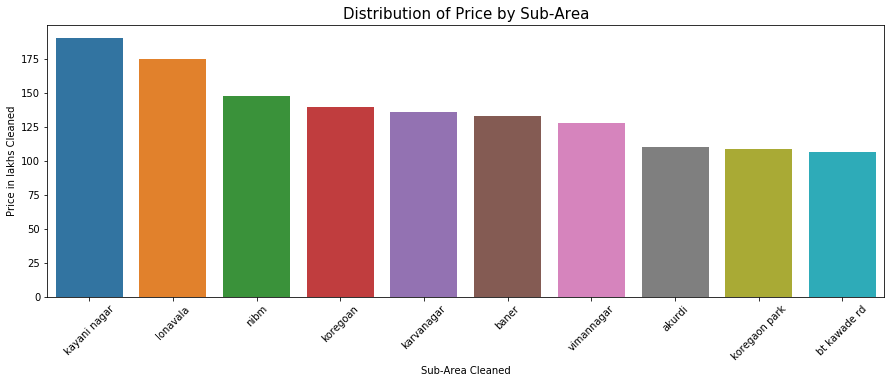

In [8]:
temp = (df.groupby('Sub-Area Cleaned')['Price in lakhs Cleaned'].mean()
            .reset_index().sort_values(by='Price in lakhs Cleaned',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Sub-Area Cleaned'],y=temp['Price in lakhs Cleaned'])
plt.title("Distribution of Price by Sub-Area",size=15)
plt.xticks(rotation=45)
plt.show()

In [27]:
# creating the price by sub-area feature
df['Price by sub-area'] =  df.groupby('Sub-Area Cleaned')['Price in lakhs Cleaned'].transform('mean')
df.head(3)

,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned,Price by sub-area,Amenities score
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,670.0,51.5,62.897,7
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0,62.897,7
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0,62.897,7


In [12]:
# checking the correlation of the feature
df[['Price by sub-area','Price in lakhs Cleaned']].corr()

,Price by sub-area,Price in lakhs Cleaned
Price by sub-area,1.000000,0.743509
Price in lakhs Cleaned,0.743509,1.000000


##### Amenities score:

([Contents:](#Contents:))

In [13]:
amenities_col = df.columns.tolist()[8:15]
amenities_col

['ClubHouse Cleaned',
 'School / University in Township Cleaned',
 'Hospital in TownShip Cleaned',
 'Mall in TownShip Cleaned',
 'Park / Jogging track Cleaned',
 'Swimming Pool Cleaned',
 'Gym Cleaned']

In [21]:
temp = df[amenities_col]
temp['Amenities score'] = temp.sum(axis=1)
temp['Price'] = df['Price in lakhs Cleaned']
temp.head(3)

,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Amenities score,Price
0,1,1,1,1,1,1,1,7,51.5
1,1,1,1,1,1,1,1,7,65.0
2,1,1,1,1,1,1,1,7,74.0


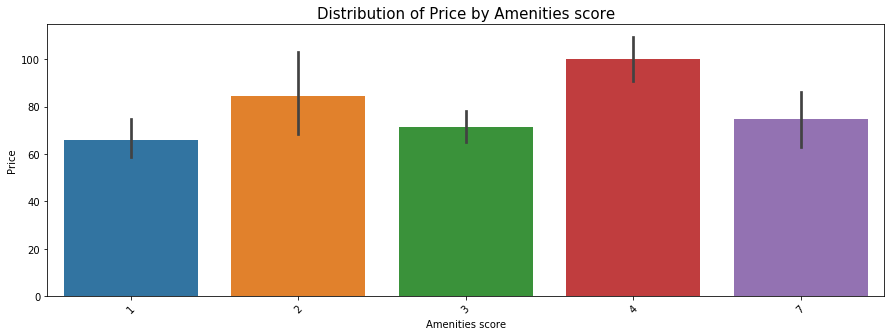

In [23]:
temp2 = (temp.groupby('Amenities score')['Price'].mean()
            .reset_index().sort_values(by='Price',ascending=False)[:10])

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Amenities score'],y=temp['Price'])
plt.title("Distribution of Price by Amenities score",size=15)
plt.xticks(rotation=45)
plt.show()

In [28]:
# Adding the amenitites score feature
df['Amenities score'] = temp['Amenities score']
print(df.shape)
df.head(3)

(199, 19)


,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned,Price by sub-area,Amenities score
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,670.0,51.5,62.897,7
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0,62.897,7
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0,62.897,7


##### Average price by Amenities score:

([Contents:](#Contents:))

In [30]:
# creating the price by amenities score feature
df['Price by Amenities score'] =  df.groupby('Amenities score')['Price in lakhs Cleaned'].transform('mean')
print(df.shape)
df.head(3)

(199, 20)


,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned,Price by sub-area,Amenities score,Price by Amenities score
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,670.0,51.5,62.897,7,74.75
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0,62.897,7,74.75
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0,62.897,7,74.75


## Feature Extraction:

##### Wordcloud of the Description:

([Contents:](#Contents:))

In [33]:
# !pip install wordcloud

In [51]:
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/hariharan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [44]:
# Preprocessing the text data

REPLACE_BY_SPACE_RE = re.compile("[/(){}\[\]\|@,;!]")
BAD_SYMBOLS_RE = re.compile("[^0-9a-z #+_]")
STOPWORDS_nlp = set(stopwords.words('english'))

#Custom Stoplist
stoplist = ["i","project","living","home",'apartment',"pune","me","my","myself","we","our","ours","ourselves","you","you're","you've","you'll","you'd","your",
            "yours","yourself","yourselves","he","him","his","himself","she","she's","her","hers","herself","it",
            "it's","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","that'll",
            "these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did",
            "doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about",
            "against","between","into","through","during","before","after","above","below","to","from","up","down","in","out",
            "on","off","over","under","again","further","then","once","here","there","when","where","why","all","any",
            "both","each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too",
            "very","s","t","can","will","just","don","don't","should","should've","now","d","ll","m","o","re","ve","y","ain",
            "aren","couldn","didn","doesn","hadn","hasn",
            "haven","isn","ma","mightn","mustn","needn","shan","shan't",
            "shouldn","wasn","weren","won","rt","rt","qt","for",
            "the","with","in","of","and","its","it","this","i","have","has","would","could","you","a","an",
            "be","am","can","edushopper","will","to","on","is","by","ive","im","your","we","are","at","as","any","ebay","thank","hello","know",
            "need","want","look","hi","sorry","http", "https","body","dear","hello","hi","thanks","sir","tomorrow","sent","send","see","there","welcome","what","well","us"]

STOPWORDS_nlp.update(stoplist)

# Function to preprocess the text
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.replace("\d+"," ") # removing digits
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #removing mentions and urls
    text = text.lower() # lowercase text
    text =  re.sub('[0-9]+', '', text)
    text = REPLACE_BY_SPACE_RE.sub(" ", text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(" ", text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([word for word in text.split() if word not in STOPWORDS_nlp]) # delete stopwors from text
    text = text.strip()
    return text

# Cleaning the "text" column in the data frame using the above defined function
df_text = df["Description Cleaned"].astype(str).apply(text_prepare)
df_text.head()

0    shapoorji paloonji comunity located suburbs ba...
1    vanaha township located near lonavala hill ran...
2    vanaha society suitable aged group people play...
3    vanaha township offering bhk grand prpoerties ...
4    area hub prestigious schools like bishop high ...
Name: Description Cleaned, dtype: object

In [45]:
text = " ".join(sent for sent in df_text)
print("There are {} words in the text.".format(len(text)))

There are 33023 words in the text.


We will use the WordCloud package in python to plot the word cloud. Some of the most common parameters in the function is:

* **max_words:** - Used to set the word limit in the word cloud.
* **height:** - Used to set the height of the plot
* **width:** - Used to set the width of the plot
* **collocations:** - Used to set whether to include collocations (bigrams) of two words
* **stopwords:** - Used to remove words from the plot

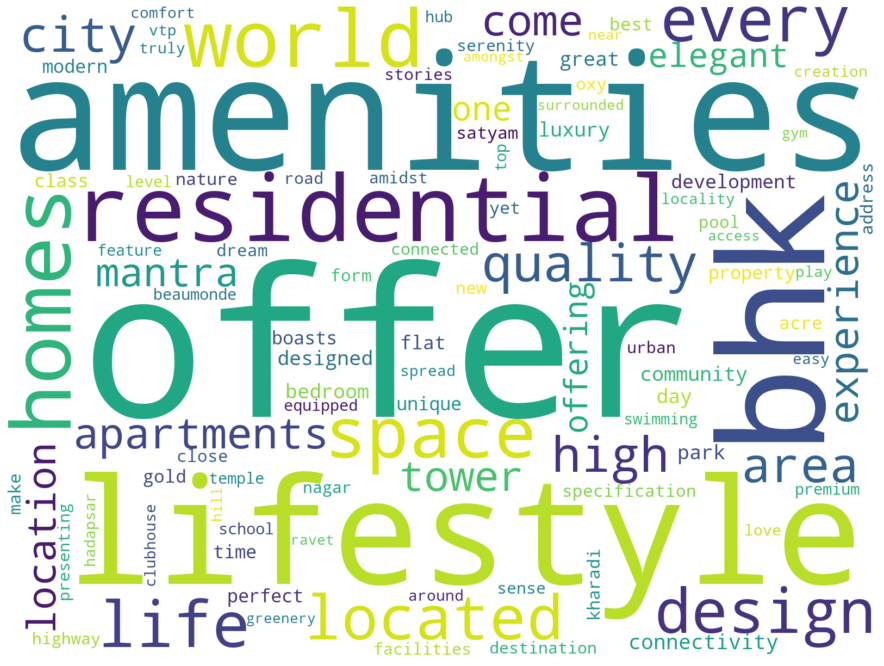

In [46]:
wordcloud = WordCloud(background_color = "white", height=1200, width= 1600, collocations=False , max_words= 100).generate(text)
plt.figure(figsize= (16,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

##### POS features:

([Contents:](#Contents:))

In [70]:
# cleaning the description column
df["Description Cleaned"] =  df["Description Cleaned"].astype(str).apply(text_prepare)

In [78]:
from collections import Counter

def pos_counter(x,pos):
    """
    Returns the count for the given parts of speech tag
    
    NN - Noun
    VB - Verb
    JJ - Adjective
    RB - Adverb
    """
    tokens = nltk.word_tokenize(x.lower())
    tokens = [word for word in tokens if word not in STOPWORDS_nlp]
    text = nltk.Text(tokens)
    tags = nltk.pos_tag(text)
    counts = Counter(tag for word,tag in tags)
    return counts[pos]

df['Noun_Counts'] = df['Description Cleaned'].apply(lambda x: pos_counter(x,'NN'))
df['Verb_Counts'] = df['Description Cleaned'].apply(lambda x: (pos_counter(x,'VB')+pos_counter(x,'RB')))
df['Adjective_Counts'] = df['Description Cleaned'].apply(lambda x: pos_counter(x,'JJ'))

In [79]:
print(df.shape)
df.head()

(199, 23)


,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned,Price by sub-area,Amenities score,Price by Amenities score,Noun_Counts,Verb_Counts,Adjective_Counts
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located suburbs ba...,1,1,1,1,1,1,1,670.0,51.5,62.897000,7,74.75,9,1,3
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near lonavala hill ran...,1,1,1,1,1,1,1,774.0,65.0,62.897000,7,74.75,9,1,3
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society suitable aged group people play...,1,1,1,1,1,1,1,889.0,74.0,62.897000,7,74.75,9,1,3
3,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha township offering bhk grand prpoerties ...,1,1,1,1,1,1,1,1018.0,89.0,62.897000,7,74.75,8,1,3
4,pune,maharashtra,india,2.0,mahalunge,godrej properties,godrej hills retreat,area hub prestigious schools like bishop high ...,1,1,1,1,1,1,1,743.0,74.0,74.833333,7,74.75,12,1,6


##### Ngram features:

([Contents:](#Contents:))

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
cv = CountVectorizer(ngram_range=(2,2),max_features=10)
cv_object = cv.fit(df['Description Cleaned'])

In [90]:
X = cv_object.transform(df['Description Cleaned'])
print(X.shape)
X.toarray()

(199, 10)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [91]:
cv_object.get_feature_names()

['boasts elegant',
 'elegant towers',
 'every day',
 'great community',
 'mantra gold',
 'offering bedroom',
 'quality specification',
 'stories offering',
 'towers stories',
 'world class']

In [92]:
df_ngram = pd.DataFrame(X.toarray(),columns=cv_object.get_feature_names())
print(df_ngram.shape)
df_ngram.head()

(199, 10)


,boasts elegant,elegant towers,every day,great community,mantra gold,offering bedroom,quality specification,stories offering,towers stories,world class
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [95]:
# Adding this to the main dataframe
df_final = pd.concat([df.reset_index(drop=True),df_ngram.reset_index(drop=True)],axis=1)
df_final.shape

(199, 33)

In [97]:
df_final.sample(5)

,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned,Price by sub-area,Amenities score,Price by Amenities score,Noun_Counts,Verb_Counts,Adjective_Counts,boasts elegant,elegant towers,every day,great community,mantra gold,offering bedroom,quality specification,stories offering,towers stories,world class
168,pune,maharashtra,india,2.0,handewadi,majestique landmarks,rhythm county,wisdom park balewadi chandrarang developers sa...,0,0,0,0,1,1,0,727.0,51.5,52.742727,2,84.414483,7,0,4,0,0,0,0,0,0,0,0,0,0
59,pune,maharashtra,india,3.0,hadapsar,ravima ventures,newton homes,newton homes boasts elegant towers stories off...,0,0,0,0,1,0,0,917.0,84.0,76.387500,1,65.719048,8,0,3,1,1,0,1,0,1,1,1,1,0
3,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha township offering bhk grand prpoerties ...,1,1,1,1,1,1,1,1018.0,89.0,62.897000,7,74.750000,8,1,3,0,0,0,0,0,0,0,0,0,0
76,pune,maharashtra,india,2.5,manjri,jhala group,tranquility annexe,boasts elegant towers stories offering bedroom...,1,0,0,0,1,1,1,792.0,65.5,68.000000,4,100.099691,4,1,2,1,1,0,0,0,1,0,1,1,0
16,pune,maharashtra,india,2.0,mahalunge,vtp reality,vtp blue water,vtp blue wateris designed utmost precision pla...,1,0,0,0,1,1,1,670.0,58.0,74.833333,4,100.099691,19,0,4,0,0,0,0,0,0,0,0,0,0


## Saving the final model ready data:

([Contents:](#Contents:))

In [98]:
# Saving the final dataframe with model ready features as a csv file
# df_final.to_csv('data/real_estate_model_ready.csv',index=False)